In [ ]:
# ==========================
# Core Libraries
# ==========================
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Machine Learning
# ==========================
from sklearn.linear_model import LinearRegression

# ==========================
# Model Selection
# ==========================
from sklearn.model_selection import train_test_split

# ==========================
# Evaluation Metrics
# ==========================
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:

# This folder contained all the batches and hence the whole dataset as done in Part_B_FullDataCollection
data_folder = "../full year/batches"

# Listing all the .json files
files = sorted([f for f in os.listdir(data_folder) if f.endswith(".json")])

df_list = []

# Looping and loading each file
for file in files:
    file_path = os.path.join(data_folder, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
            if data:
                df = pd.json_normalize(data)
                df_list.append(df)
                print(f" Loaded {file}")
            else:
                print(f" Empty: {file}")
        except Exception as e:
            print(f" Error in {file}: {e}")

# Combining the data into one
combined_df = pd.concat(df_list, ignore_index=True)
print(" Combined shape:", combined_df.shape)

# Saving combined raw file 
combined_df.to_csv("combined.csv", index=False)
print(" Combined data saved as 'combined.csv'")


 Loaded site_107_2015-06-01.json
 Loaded site_107_2015-07-01.json
 Loaded site_107_2015-08-01.json
 Loaded site_107_2015-09-01.json
 Loaded site_107_2015-10-01.json
 Loaded site_107_2015-11-01.json
 Loaded site_107_2015-12-01.json
 Loaded site_107_2016-01-01.json
 Loaded site_107_2016-02-01.json
 Loaded site_107_2016-03-01.json
 Loaded site_107_2016-04-01.json
 Loaded site_107_2016-05-01.json
 Loaded site_107_2016-06-01.json
 Loaded site_107_2016-07-01.json
 Loaded site_107_2016-08-01.json
 Loaded site_107_2016-09-01.json
 Loaded site_107_2016-10-01.json
 Loaded site_107_2016-11-01.json
 Loaded site_107_2016-12-01.json
 Loaded site_107_2017-01-01.json
 Loaded site_107_2017-02-01.json
 Loaded site_107_2017-03-01.json
 Loaded site_107_2017-04-01.json
 Loaded site_107_2017-05-01.json
 Loaded site_107_2017-06-01.json
 Loaded site_107_2017-07-01.json
 Loaded site_107_2017-08-01.json
 Loaded site_107_2017-09-01.json
 Loaded site_107_2017-10-01.json
 Loaded site_107_2017-11-01.json
 Loaded si

C:\Users\utsav\AppData\Local\Temp\ipykernel_22828\1256248816.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(df_list, ignore_index=True)


 Combined shape: (4340160, 14)
 Combined data saved as 'combined.csv'


In [ ]:
df=pd.read_csv("combined.csv")
# df = df.drop(columns=[
#     "AirQualityCategory", 
#     "DeterminingPollutant", 
#     "Parameter.ParameterDescription", 
#     "Parameter.UnitsDescription", 
#     "Parameter.Category", 
#     "Parameter.SubCategory", 
#     "Parameter.Frequency"
# ])

print(df.shape)
df.head()
df.isna().sum()
df.head()


C:\Users\utsav\AppData\Local\Temp\ipykernel_22828\3664842583.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("combined.csv")


(4340160, 7)


,Site_Id,Date,Hour,HourDescription,Value,Parameter.ParameterCode,Parameter.Units
0,107,2015-06-01,1,12 am - 1 am,0.212361,CO,ppm
1,107,2015-06-01,1,12 am - 1 am,65.252000,HUMID,%
2,107,2015-06-01,1,12 am - 1 am,1.212620,NO2,pphm
3,107,2015-06-01,1,12 am - 1 am,0.478448,OZONE,pphm
4,107,2015-06-01,1,12 am - 1 am,6.395000,PM10,µg/m³


In [ ]:
import pandas as pd

# Loading the raw data set
df = pd.read_csv("combined.csv")

# Drop irrelevant metadata columns
columns_to_drop = [
    "AirQualityCategory",
    "DeterminingPollutant",
    "Parameter.ParameterDescription",
    "Parameter.UnitsDescription",
    "Parameter.Category",
    "Parameter.SubCategory",
    "Parameter.Frequency"
]
df_reduced = df.drop(columns=columns_to_drop)

# Save intermediate cleaned file
df_reduced.to_csv("full_relevant_features.csv", index=False)
print(" Saved reduced dataset as Full_Relevant")


C:\Users\utsav\AppData\Local\Temp\ipykernel_22828\3912167837.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined.csv")


 Saved reduced dataset as Full_Relevant


In [5]:
df=pd.read_csv("full_relevant_features.csv")
df.head()


,Site_Id,Date,Hour,HourDescription,Value,Parameter.ParameterCode,Parameter.Units
0,107,2015-06-01,1,12 am - 1 am,0.212361,CO,ppm
1,107,2015-06-01,1,12 am - 1 am,65.252000,HUMID,%
2,107,2015-06-01,1,12 am - 1 am,1.212620,NO2,pphm
3,107,2015-06-01,1,12 am - 1 am,0.478448,OZONE,pphm
4,107,2015-06-01,1,12 am - 1 am,6.395000,PM10,µg/m³


Same as done in Part A

In [ ]:
import pandas as pd
df=pd.read_csv("full_relevant_features.csv")
# Converting Date to datetime (only date part)
df['ParsedDate'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extracting start hour string from HourDesc
df['StartHourStr'] = df['HourDescription'].str.extract(r'(^[\d]+ ?[ap]m)', expand=False)

# Converting start hour to integer (24-hour format)
df['HourInt'] = pd.to_datetime(df['StartHourStr'], format='%I %p', errors='coerce').dt.hour
df['Timestamp'] = df['ParsedDate'] + pd.to_timedelta(df['HourInt'], unit='h')
df = df.dropna(subset=['Timestamp'])

# Pivoting the data
pivoted_df = df.pivot_table(
    index=['Site_Id', 'Timestamp'],
    columns='Parameter.ParameterCode',
    values='Value',
    aggfunc='first'
).reset_index()

pivoted_df.columns.name = None
pivoted_df.to_csv("full_simplified.csv", index=False)


In [10]:
df=pd.read_csv("full_simplified.csv")
df.head()
df.shape
print(df["Site_Id"].value_counts())

Site_Id
2560    34274
107     33718
39      32644
919     25375
1141    17413
Name: count, dtype: int64


In [11]:
df.head()

,Site_Id,Timestamp,CO,HUMID,NO2,OZONE,PM10,PM2.5,SD1,TEMP,WDR,WSP
0,39,2015-01-06 00:00:00,0.275744,76.150,1.140613,0.80395,6.484,8.034,49.993,9.700,292.368,0.924
1,39,2015-01-06 01:00:00,NaN,59.720,NaN,NaN,0.477,4.407,27.682,11.954,308.139,2.047
2,39,2015-01-06 02:00:00,0.076486,56.884,0.093000,2.10390,5.542,3.822,21.372,12.436,314.578,2.827
3,39,2015-01-06 03:00:00,0.087004,59.945,0.235300,1.97130,3.896,2.004,20.994,11.786,310.337,2.709
4,39,2015-01-06 04:00:00,0.078759,59.265,0.375000,1.89800,7.401,3.383,21.597,11.968,305.261,2.091


In [ ]:


# Load the simplified, pivoted data
df = pd.read_csv("full_simplified.csv", parse_dates=["Timestamp"])

# Sort the data by Site and Timestamp to ensure chronological order
df = df.sort_values(["Site_Id", "Timestamp"])

# Apply forward-fill within each site group
df_filled = df.groupby("Site_Id").apply(lambda group: group.ffill()).reset_index(drop=True)
# Drop rows with NaNs in either features or target before regression
df_filled = df_filled.dropna(subset=["CO", "HUMID", "NO2", "OZONE", "PM10", "PM2.5", "SD1", "TEMP", "WDR", "WSP"])

# Save the cleaned file
df_filled.to_csv("full_cleaned.csv", index=False)
print(" Forward-filled dataset saved as 'full_cleaned.csv'")


C:\Users\utsav\AppData\Local\Temp\ipykernel_22828\447885459.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby("Site_Id").apply(lambda group: group.ffill()).reset_index(drop=True)


 Forward-filled dataset saved as 'full_cleaned.csv'


In [ ]:

    
# Load the cleaned dataset
df = pd.read_csv("full_cleaned.csv", parse_dates=["Timestamp"])
# Shape of the dataset
print(f"#Dataset Shape: {df.shape}")
# Missing values check
print("#Missing Values per Column: (Already performeed ffill)")
print(df.isna().sum())

#Dataset Shape: (143245, 12)
#Missing Values per Column: (Already performeed ffill)
Site_Id      0
Timestamp    0
CO           0
HUMID        0
NO2          0
OZONE        0
PM10         0
PM2.5        0
SD1          0
TEMP         0
WDR          0
WSP          0
dtype: int64


In [23]:
df.describe()

,Site_Id,Timestamp,CO,HUMID,NO2,OZONE,PM10,PM2.5,SD1,TEMP,WDR,WSP
count,143245.000000,143245,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000,143245.000000
mean,945.775050,2020-12-03 09:32:18.036231680,0.173127,69.506213,0.920204,1.602188,17.373995,7.304491,37.263889,17.707525,195.596213,1.729847
min,39.000000,2015-01-06 00:00:00,-0.249962,6.443000,-0.485500,-0.243000,-9.997000,-9.998000,3.540000,0.553000,0.003000,0.003000
25%,107.000000,2018-09-12 02:00:00,0.071177,55.746000,0.308423,0.462700,9.560000,2.843000,20.486000,13.668000,116.183000,0.670000
50%,919.000000,2021-03-03 06:00:00,0.157642,71.479000,0.701273,1.587725,14.656000,5.645000,30.870000,17.770000,212.244000,1.397000
75%,1141.000000,2023-04-08 15:00:00,0.253858,85.770000,1.386914,2.425200,21.503000,9.524000,48.913000,21.584000,271.841000,2.419000
max,2560.000000,2025-12-05 23:00:00,13.514066,104.639000,6.422156,20.598892,1545.796000,558.995000,152.825000,46.802000,359.998000,19.175000
std,989.676422,NaN,0.211651,19.358156,0.774690,1.238393,16.406491,10.543095,21.448526,5.799785,98.075313,1.383119


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143245 entries, 0 to 143244
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Site_Id    143245 non-null  int64         
 1   Timestamp  143245 non-null  datetime64[ns]
 2   CO         143245 non-null  float64       
 3   HUMID      143245 non-null  float64       
 4   NO2        143245 non-null  float64       
 5   OZONE      143245 non-null  float64       
 6   PM10       143245 non-null  float64       
 7   PM2.5      143245 non-null  float64       
 8   SD1        143245 non-null  float64       
 9   TEMP       143245 non-null  float64       
 10  WDR        143245 non-null  float64       
 11  WSP        143245 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 13.1 MB


In [25]:
# First few rows
print("First 5 Rows:")
df.head()

First 5 Rows:


,Site_Id,Timestamp,CO,HUMID,NO2,OZONE,PM10,PM2.5,SD1,TEMP,WDR,WSP
0,39,2015-01-06 00:00:00,0.275744,76.150,1.140613,0.80395,6.484,8.034,49.993,9.700,292.368,0.924
1,39,2015-01-06 01:00:00,0.275744,59.720,1.140613,0.80395,0.477,4.407,27.682,11.954,308.139,2.047
2,39,2015-01-06 02:00:00,0.076486,56.884,0.093000,2.10390,5.542,3.822,21.372,12.436,314.578,2.827
3,39,2015-01-06 03:00:00,0.087004,59.945,0.235300,1.97130,3.896,2.004,20.994,11.786,310.337,2.709
4,39,2015-01-06 04:00:00,0.078759,59.265,0.375000,1.89800,7.401,3.383,21.597,11.968,305.261,2.091


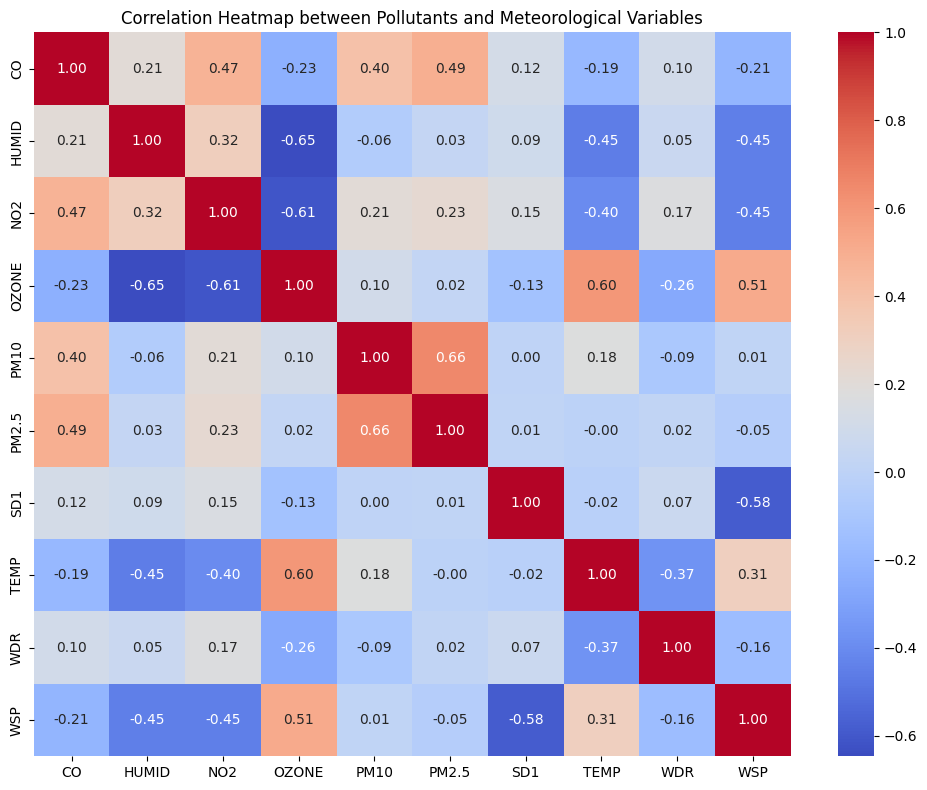

In [ ]:


# Load the cleaned dataset
df = pd.read_csv("full_cleaned.csv", parse_dates=["Timestamp"])

# Drop non-numeric columns before computing correlation
corr_df = df.drop(columns=["Site_Id", "Timestamp"])

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap between Pollutants and Meteorological Variables")
plt.tight_layout()



In [ ]:
features_for_clustering = df.drop(columns=["Site_Id", "Timestamp"])


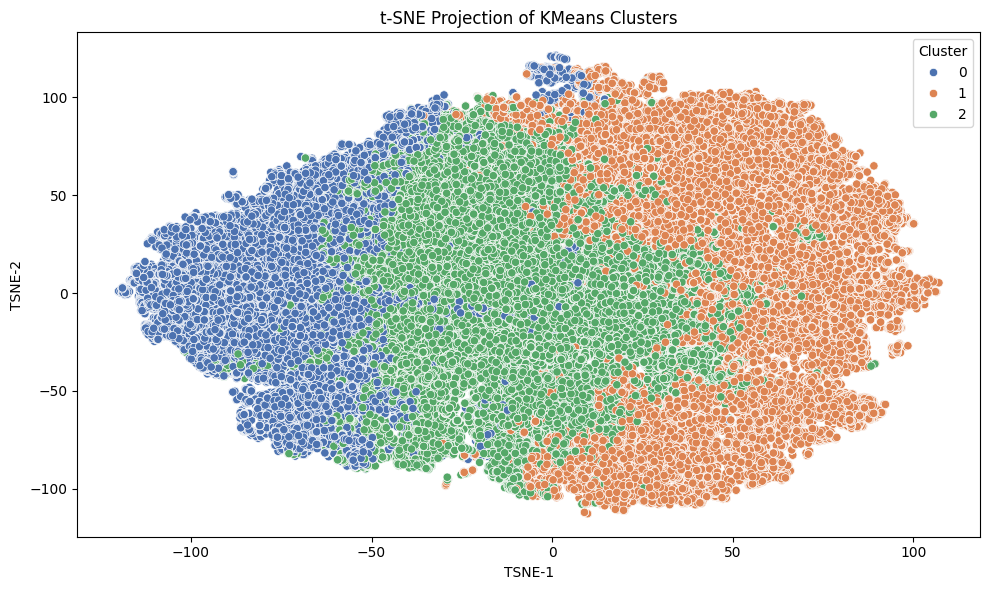

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecting features and scale
features = df.drop(columns=["Site_Id", "Timestamp"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# 3. Apply t-SNE for 2D visualisation
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(X_scaled)
df["TSNE-1"] = tsne_results[:, 0]
df["TSNE-2"] = tsne_results[:, 1]

# 4. Plotting the cluseters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="TSNE-1", y="TSNE-2", hue="Cluster", palette="deep")
plt.title("t-SNE Projection of KMeans Clusters")
plt.tight_layout()
# plt.savefig("finalfiles/plots/tsne_clusters.png")
plt.show()


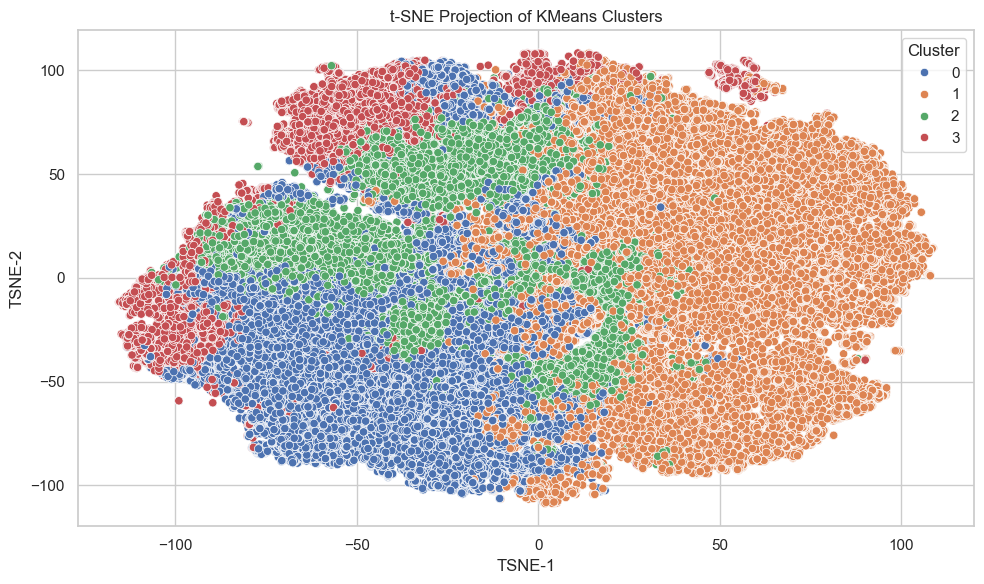

In [ ]:
# Performed for n_clusters=4

# 1. Select features and scale
features = df.drop(columns=["Site_Id", "Timestamp"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# 3. Apply t-SNE for 2D visualisation
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(X_scaled)
df["TSNE-1"] = tsne_results[:, 0]
df["TSNE-2"] = tsne_results[:, 1]

# 4. Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="TSNE-1", y="TSNE-2", hue="Cluster", palette="deep")
plt.title("t-SNE Projection of KMeans Clusters")
plt.tight_layout()
# plt.savefig("finalfiles/plots/tsne_clusters.png")
plt.show()


In [32]:
df.head()

,Site_Id,Timestamp,CO,HUMID,NO2,OZONE,PM10,PM2.5,SD1,TEMP,WDR,WSP,Cluster,TSNE-1,TSNE-2
0,39,2015-01-06 00:00:00,0.275744,76.150,1.140613,0.80395,6.484,8.034,49.993,9.700,292.368,0.924,2,-35.115116,-24.035801
1,39,2015-01-06 01:00:00,0.275744,59.720,1.140613,0.80395,0.477,4.407,27.682,11.954,308.139,2.047,2,-14.738066,-75.715195
2,39,2015-01-06 02:00:00,0.076486,56.884,0.093000,2.10390,5.542,3.822,21.372,12.436,314.578,2.827,1,2.478419,-73.501534
3,39,2015-01-06 03:00:00,0.087004,59.945,0.235300,1.97130,3.896,2.004,20.994,11.786,310.337,2.709,2,1.761613,-73.660751
4,39,2015-01-06 04:00:00,0.078759,59.265,0.375000,1.89800,7.401,3.383,21.597,11.968,305.261,2.091,2,2.402620,-74.538338


In [ ]:
# Calculating mean of the features per cluster
selected_features = ["PM2.5", "PM10", "NO2", "CO", "OZONE", "TEMP", "HUMID", "WSP", "WDR", "SD1"]
cluster_means = df.groupby("Cluster")[selected_features].mean().round(2)

#Restults

pd.set_option("display.max_columns", None)
print(cluster_means)


         PM2.5   PM10   NO2    CO  OZONE   TEMP  HUMID   WSP     WDR    SD1
Cluster                                                                    
0        13.09  23.26  1.98  0.38   0.30  12.61  82.11  0.83  246.07  41.40
1         6.42  18.20  0.41  0.11   2.67  21.58  54.59  2.92  159.01  28.37
2         4.89  13.24  0.82  0.11   1.30  16.82  76.91  1.08  202.70  43.60


### EDA

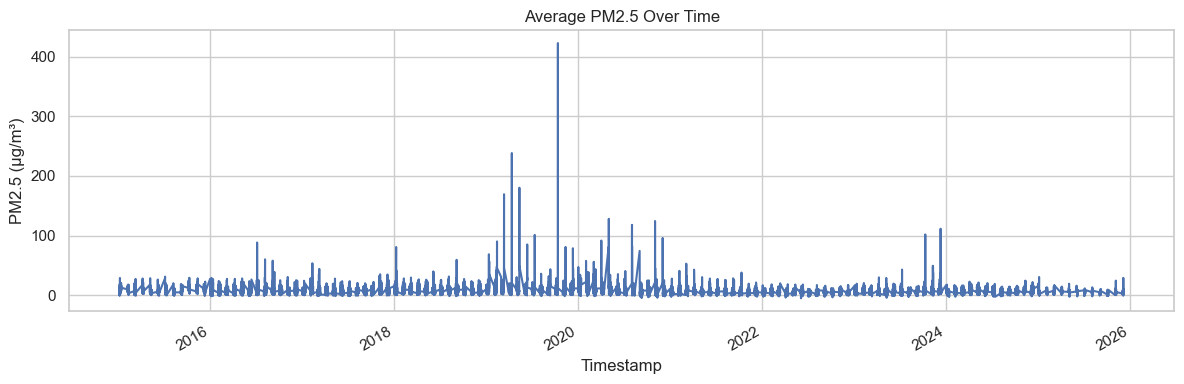

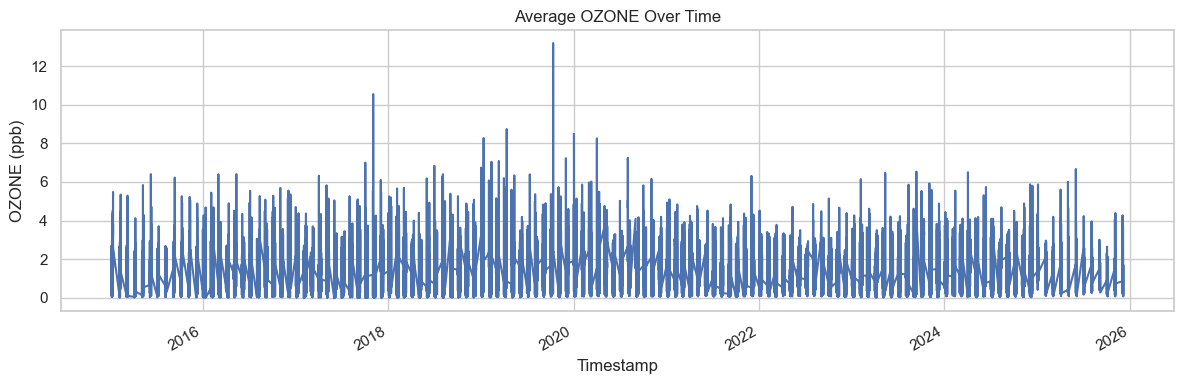

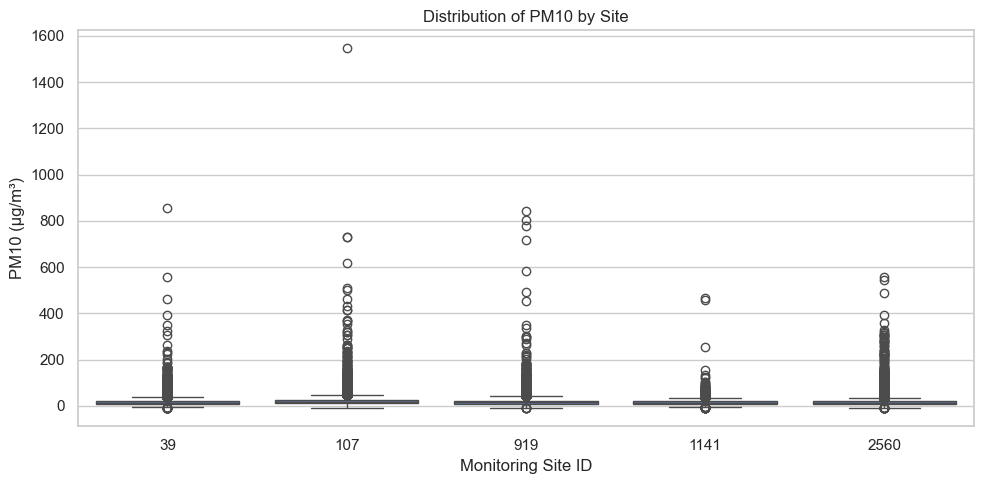

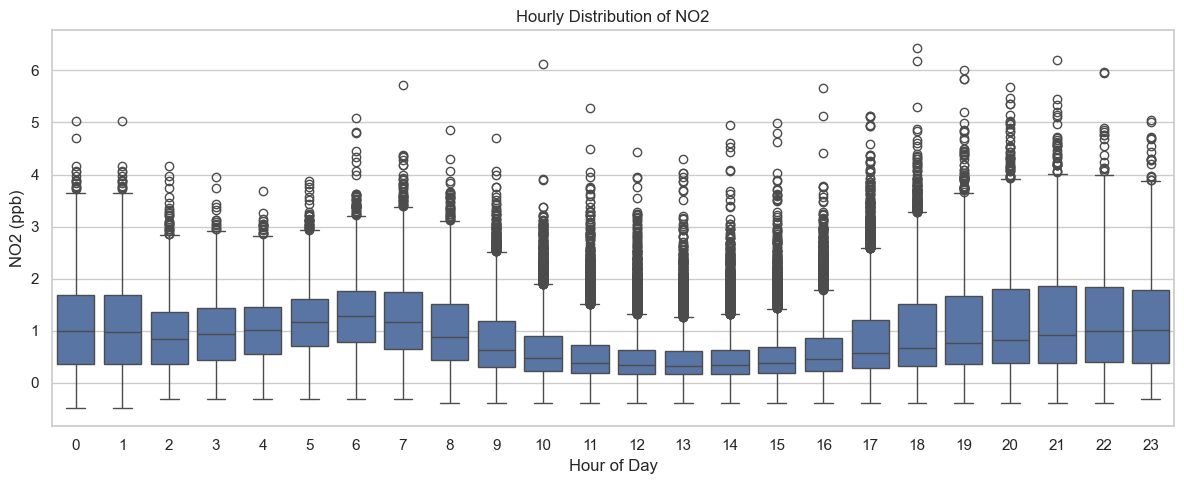

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("full_cleaned.csv", parse_dates=["Timestamp"])

# --- 1. Time-series plot for PM2.5 ---
plt.figure(figsize=(12, 4))
df.groupby("Timestamp")["PM2.5"].mean().plot()
plt.title("Average PM2.5 Over Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()

# --- 2. Time-series plot for OZONE ---
plt.figure(figsize=(12, 4))
df.groupby("Timestamp")["OZONE"].mean().plot()
plt.title("Average OZONE Over Time")
plt.ylabel("OZONE (ppb)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()

# --- 3. Boxplot of PM10 by Site ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Site_Id", y="PM10")
plt.title("Distribution of PM10 by Site")
plt.ylabel("PM10 (µg/m³)")
plt.xlabel("Monitoring Site ID")
plt.tight_layout()
plt.show()

# --- 4. Boxplot of NO2 by Hour ---
df["Hour"] = df["Timestamp"].dt.hour
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Hour", y="NO2")
plt.title("Hourly Distribution of NO2")
plt.ylabel("NO2 (ppb)")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


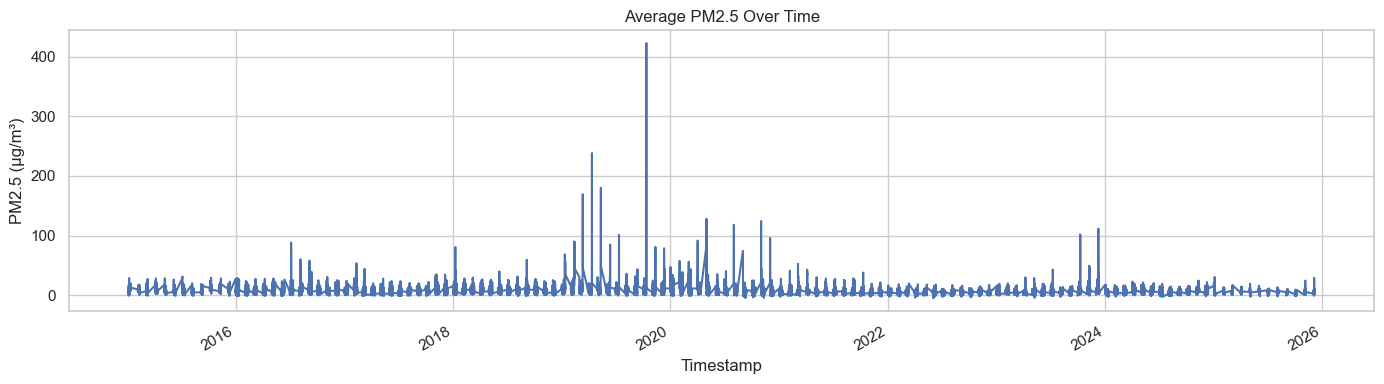

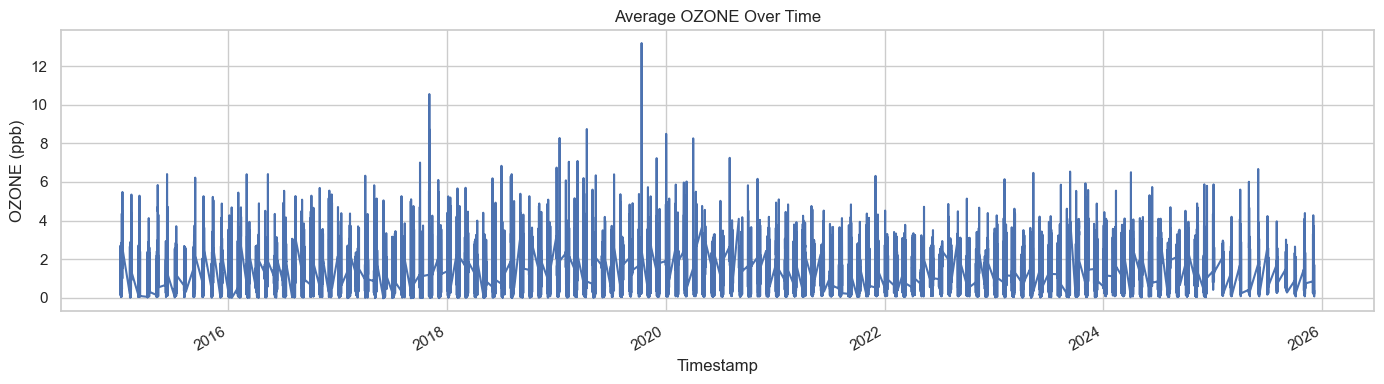

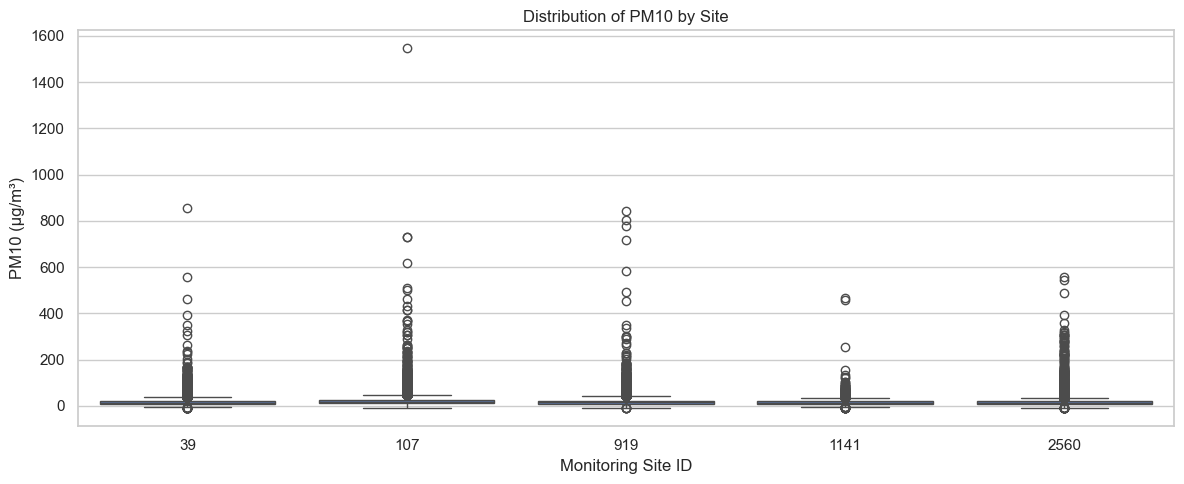

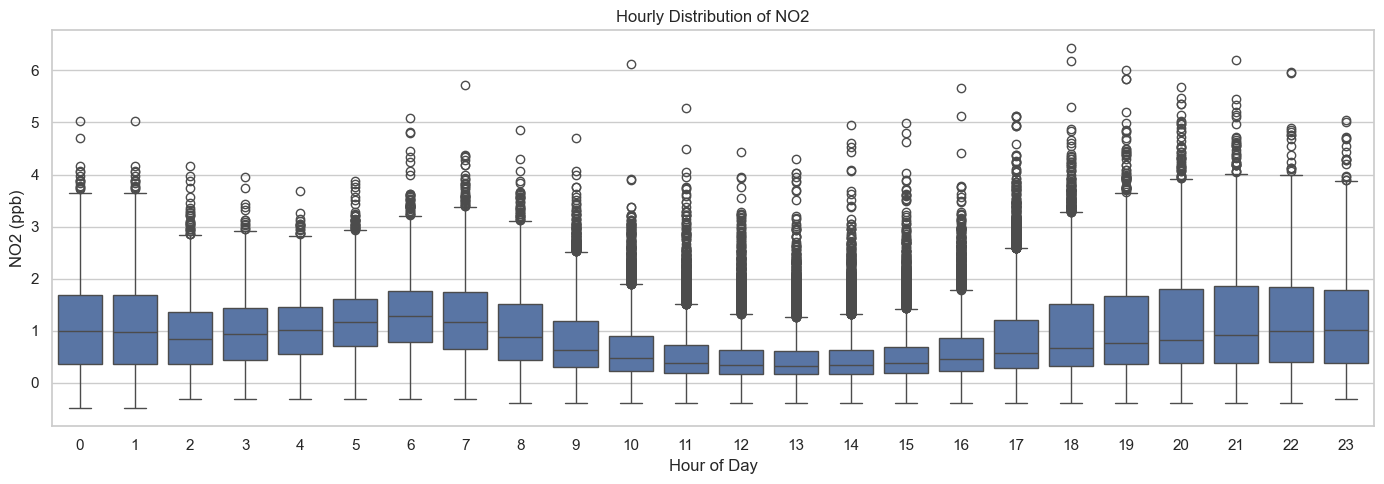

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("full_cleaned.csv", parse_dates=["Timestamp"])

# --- 1. Time-series plot for PM2.5 ---
plt.figure(figsize=(14, 4))
df.groupby("Timestamp")["PM2.5"].mean().plot()
plt.title("Average PM2.5 Over Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()

# --- 2. Time-series plot for OZONE ---
plt.figure(figsize=(14, 4))
df.groupby("Timestamp")["OZONE"].mean().plot()
plt.title("Average OZONE Over Time")
plt.ylabel("OZONE (ppb)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()

# --- 3. Boxplot of PM10 by Site ---
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Site_Id", y="PM10")
plt.title("Distribution of PM10 by Site")
plt.ylabel("PM10 (µg/m³)")
plt.xlabel("Monitoring Site ID")
plt.tight_layout()
plt.show()

# --- 4. Boxplot of NO2 by Hour of Day ---
df["Hour"] = df["Timestamp"].dt.hour
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Hour", y="NO2")
plt.title("Hourly Distribution of NO2")
plt.ylabel("NO2 (ppb)")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()




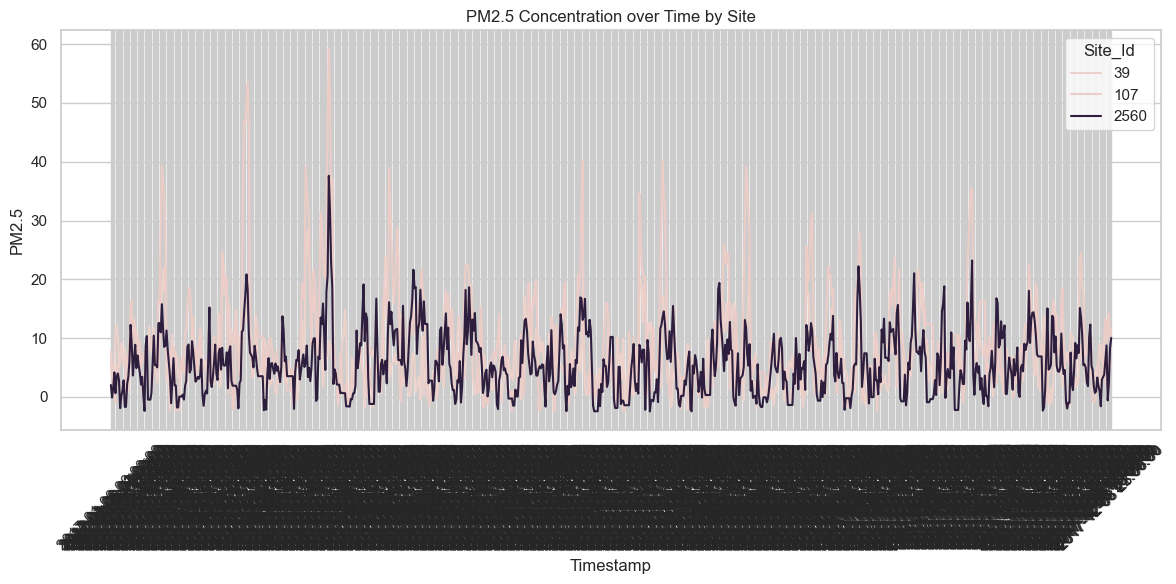

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Timestamp", y="PM2.5", hue="Site_Id")
plt.title("PM2.5 Concentration over Time by Site")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("finalfiles/plots/pm25_timeseries.png")
plt.show()


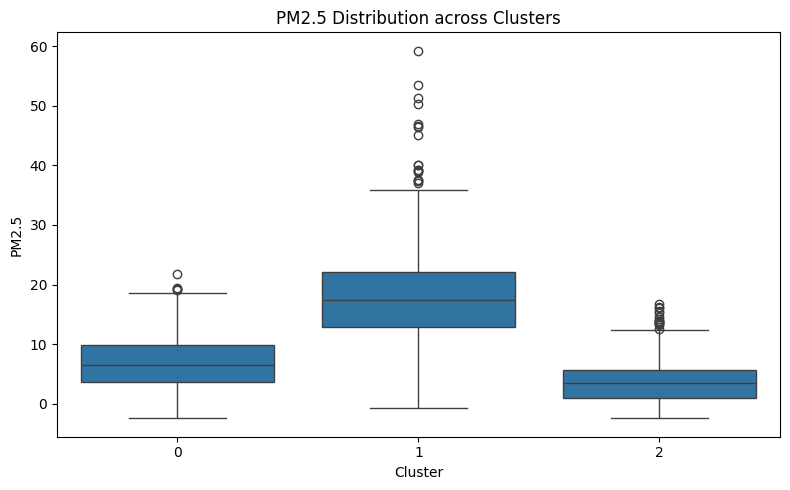

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Cluster", y="PM2.5")
plt.title("PM2.5 Distribution across Clusters")
plt.tight_layout()
# plt.savefig("finalfiles/plots/pm25_by_cluster.png")
plt.show()


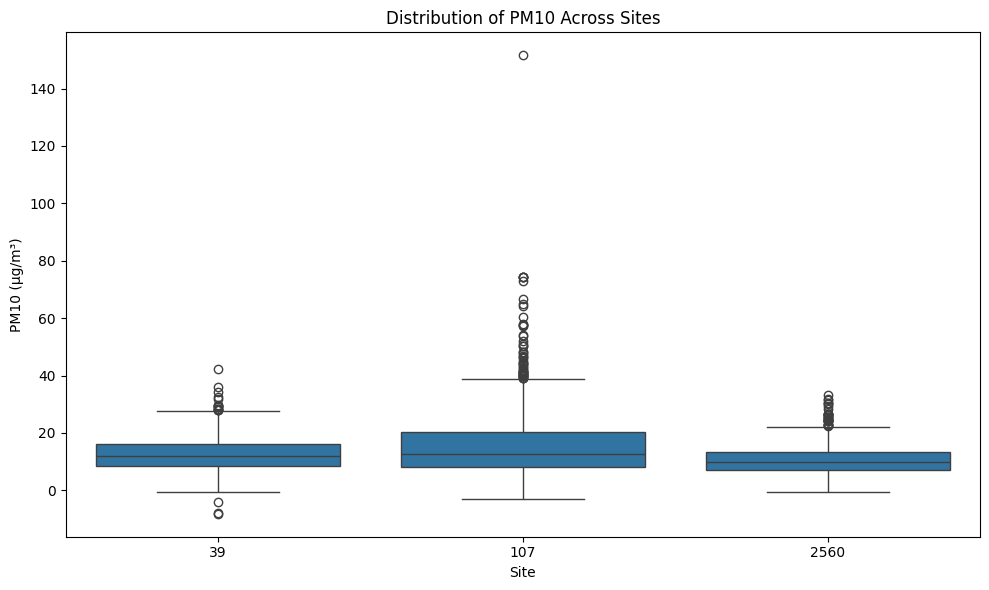

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Site_Id", y="PM10")
plt.title("Distribution of PM10 Across Sites")
plt.xlabel("Site")
plt.ylabel("PM10 (µg/m³)")
plt.tight_layout()
# plt.savefig("finalfiles/plots/pm10_boxplot_sites.png")
plt.show()


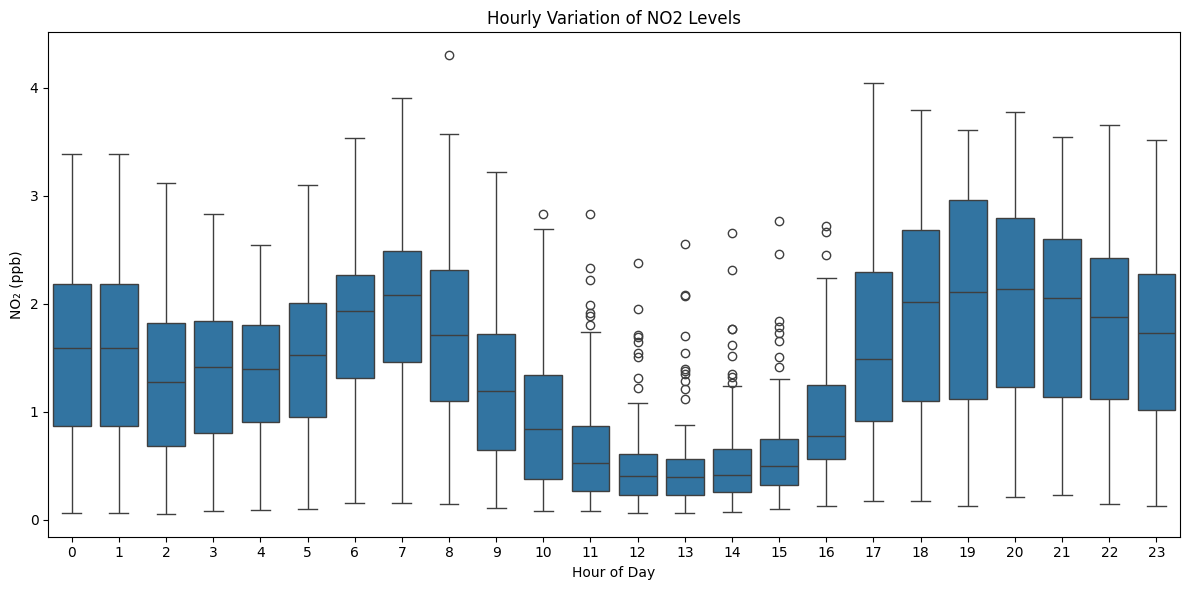

In [33]:
# Extract hour from Timestamp
df["Hour"] = df["Timestamp"].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Hour", y="NO2")
plt.title("Hourly Variation of NO2 Levels")
plt.xlabel("Hour of Day")
plt.ylabel("NO₂ (ppb)")
plt.tight_layout()
# plt.savefig("finalfiles/plots/no2_boxplot_hour.png")
plt.show()


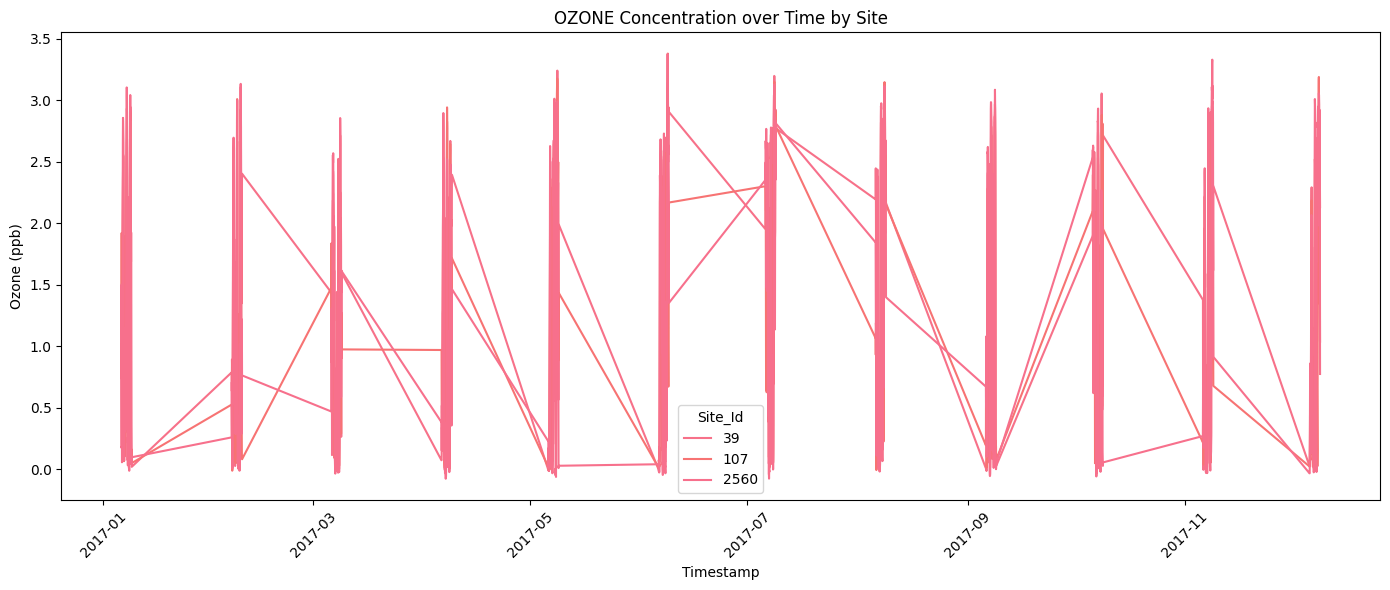

In [ ]:
# Loading the simpolified simplified dataset
df = pd.read_csv("finalfiles/cleaned.csv")  # This should contain Timestamp and OZONE

# Ensurinh Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Dropping NA in OZONE
ozone_df = df.dropna(subset=['OZONE'])

# Plotting OZONE trend over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=ozone_df, x='Timestamp', y='OZONE', hue='Site_Id', palette='husl')
plt.title("OZONE Concentration over Time by Site")
plt.ylabel("Ozone (ppb)")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

In [ ]:
df_final = pd.read_csv("finalfiles/simplified.csv")
print(df_final['Site_Id'].value_counts())
print("\nUnique Site IDs:", df_final['Site_Id'].unique())

Site_Id
39      864
107     862
2560    862
Name: count, dtype: int64

Unique Site IDs: [  39  107 2560]


## Modelling
#### Initial modelling with Linear regression to understand the nature of the dataset.

#### Linear Regression

##### Target PM2.5

R^2 Score: 0.0036248209479519122
RMSE: 10.923190425555365

Feature Coefficients:
TEMP     0.050666
HUMID    0.010932
WSP     -0.402043
WDR      0.002611
SD1     -0.009805
dtype: float64


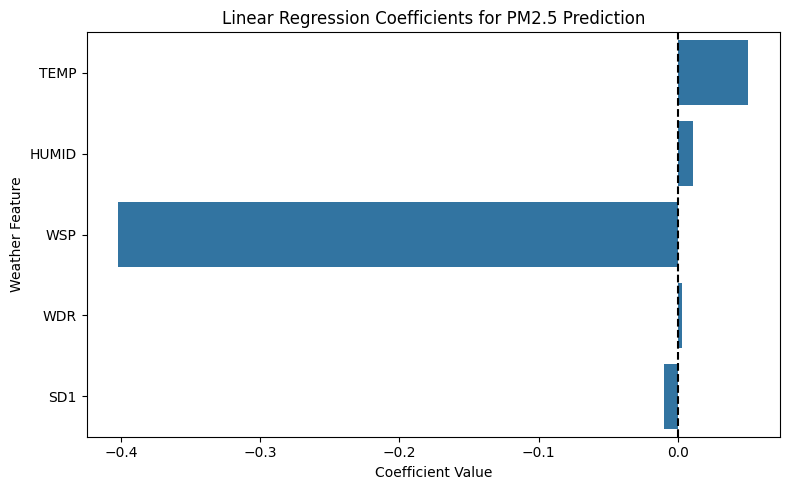

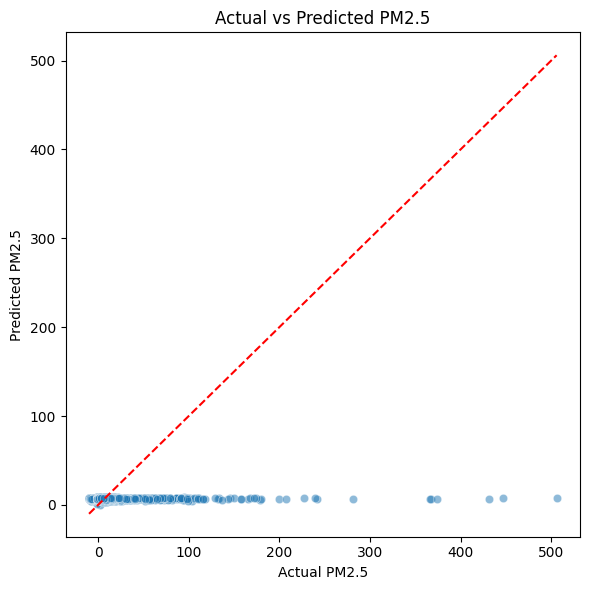

In [ ]:

# Target and predictors are chosen here. We have chosen PM2.5 as described in the Part-B report.
target = "PM2.5"
weather_features = ["TEMP", "HUMID", "WSP", "WDR", "SD1"]

X = df[weather_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model on training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predictinh and evaluating on test data set
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Coefficients
coeffs = pd.Series(model.coef_, index=weather_features)
print("\nFeature Coefficients:")
print(coeffs)
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=coeffs.values, y=coeffs.index)
plt.title("Linear Regression Coefficients for PM2.5 Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Weather Feature")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
# plt.savefig("finalfiles/plots/pm25_coefficients.png")
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5")
plt.tight_layout()
# plt.savefig("finalfiles/plots/actual_vs_predicted_pm25.png")
plt.show()


##### Perform linear regression with multiple targets

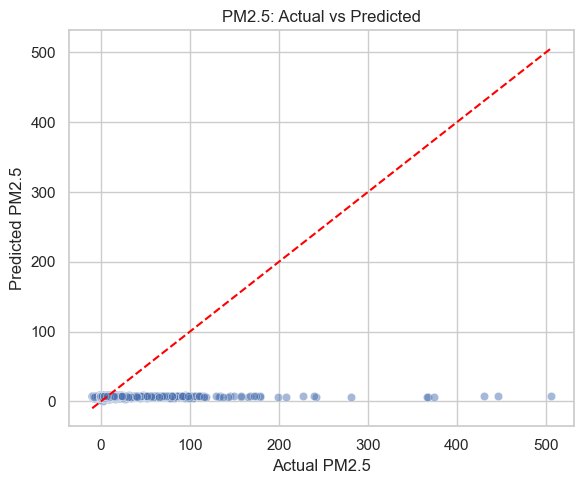

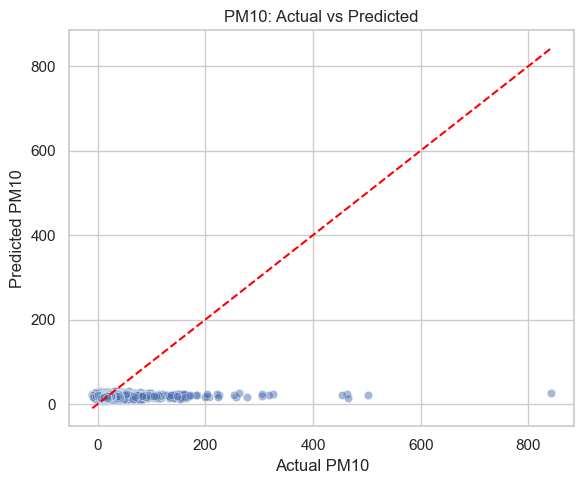

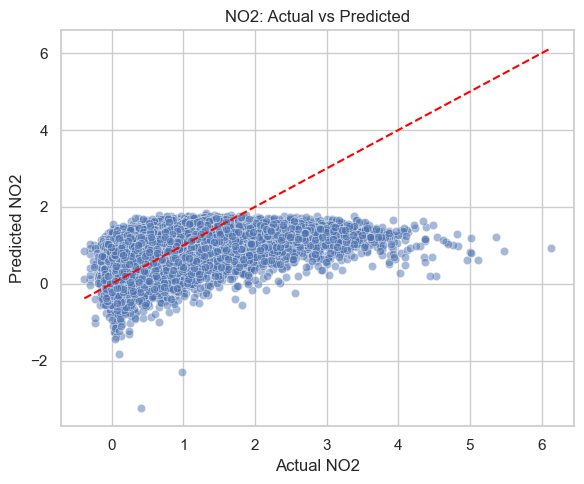

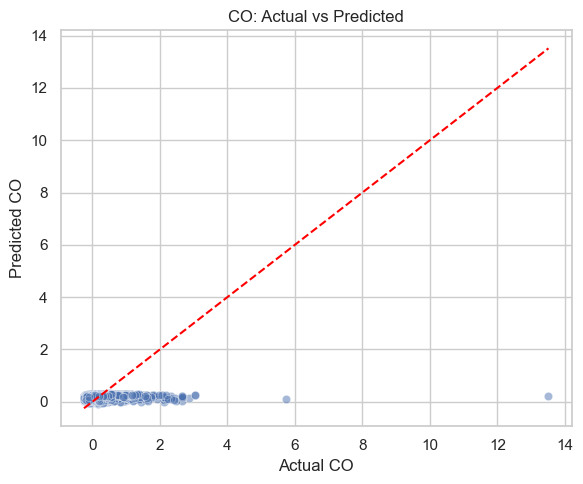

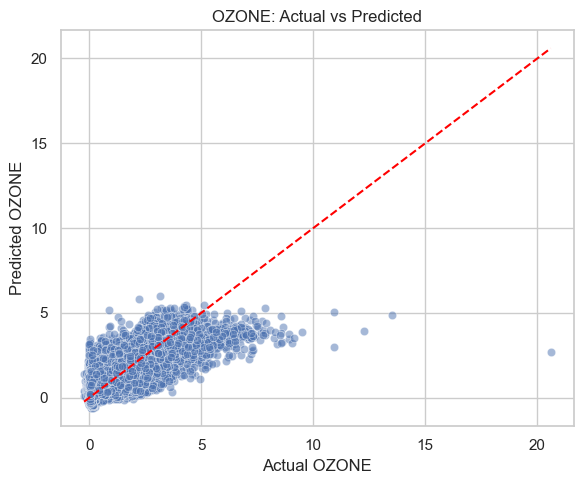

📊 Regression Performance Summary:
  Pollutant  R² Score    RMSE
0     PM2.5     0.004  10.923
1      PM10     0.037  15.118
2       NO2     0.282   0.655
3        CO     0.061   0.219
4     OZONE     0.582   0.803


In [ ]:


# Load cleaned dataset
df = pd.read_csv("full_cleaned.csv")

# Predictors
weather_features = ["TEMP", "HUMID", "WSP", "WDR", "SD1"]

# Target Pollutatns for prediction
targets = ["PM2.5", "PM10", "NO2", "CO", "OZONE"]
sns.set(style="whitegrid")

results = []

# Looping over all the pollutants
for target in targets:
    X = df[weather_features]
    y = df[target]

    #Rows are dropped if they have missing values in predictors or target
    data = pd.concat([X, y], axis=1).dropna()
    X_clean = data[weather_features]
    y_clean = data[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

    # Training model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Results
    results.append({
        "Pollutant": target,
        "R² Score": round(r2, 3),
        "RMSE": round(rmse, 3)
    })

    # Plot scatter of predicted vs actual
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Actual " + target)
    plt.ylabel("Predicted " + target)
    plt.title(f"{target}: Actual vs Predicted")
    plt.tight_layout()
    plt.show()

# Final summary table
results_df = pd.DataFrame(results)
print("Regression Performance Summary:")
print(results_df)
